# Branching Ratio Plotting

This code plots the branching ratio and total error (statistical + external). The values are inputted manually, obtained from the code "branching_ratio_calculation.ipynb". 

Weighted mean = 4.390411 ± 0.033886  (chi2/ndof = 10.03/3)


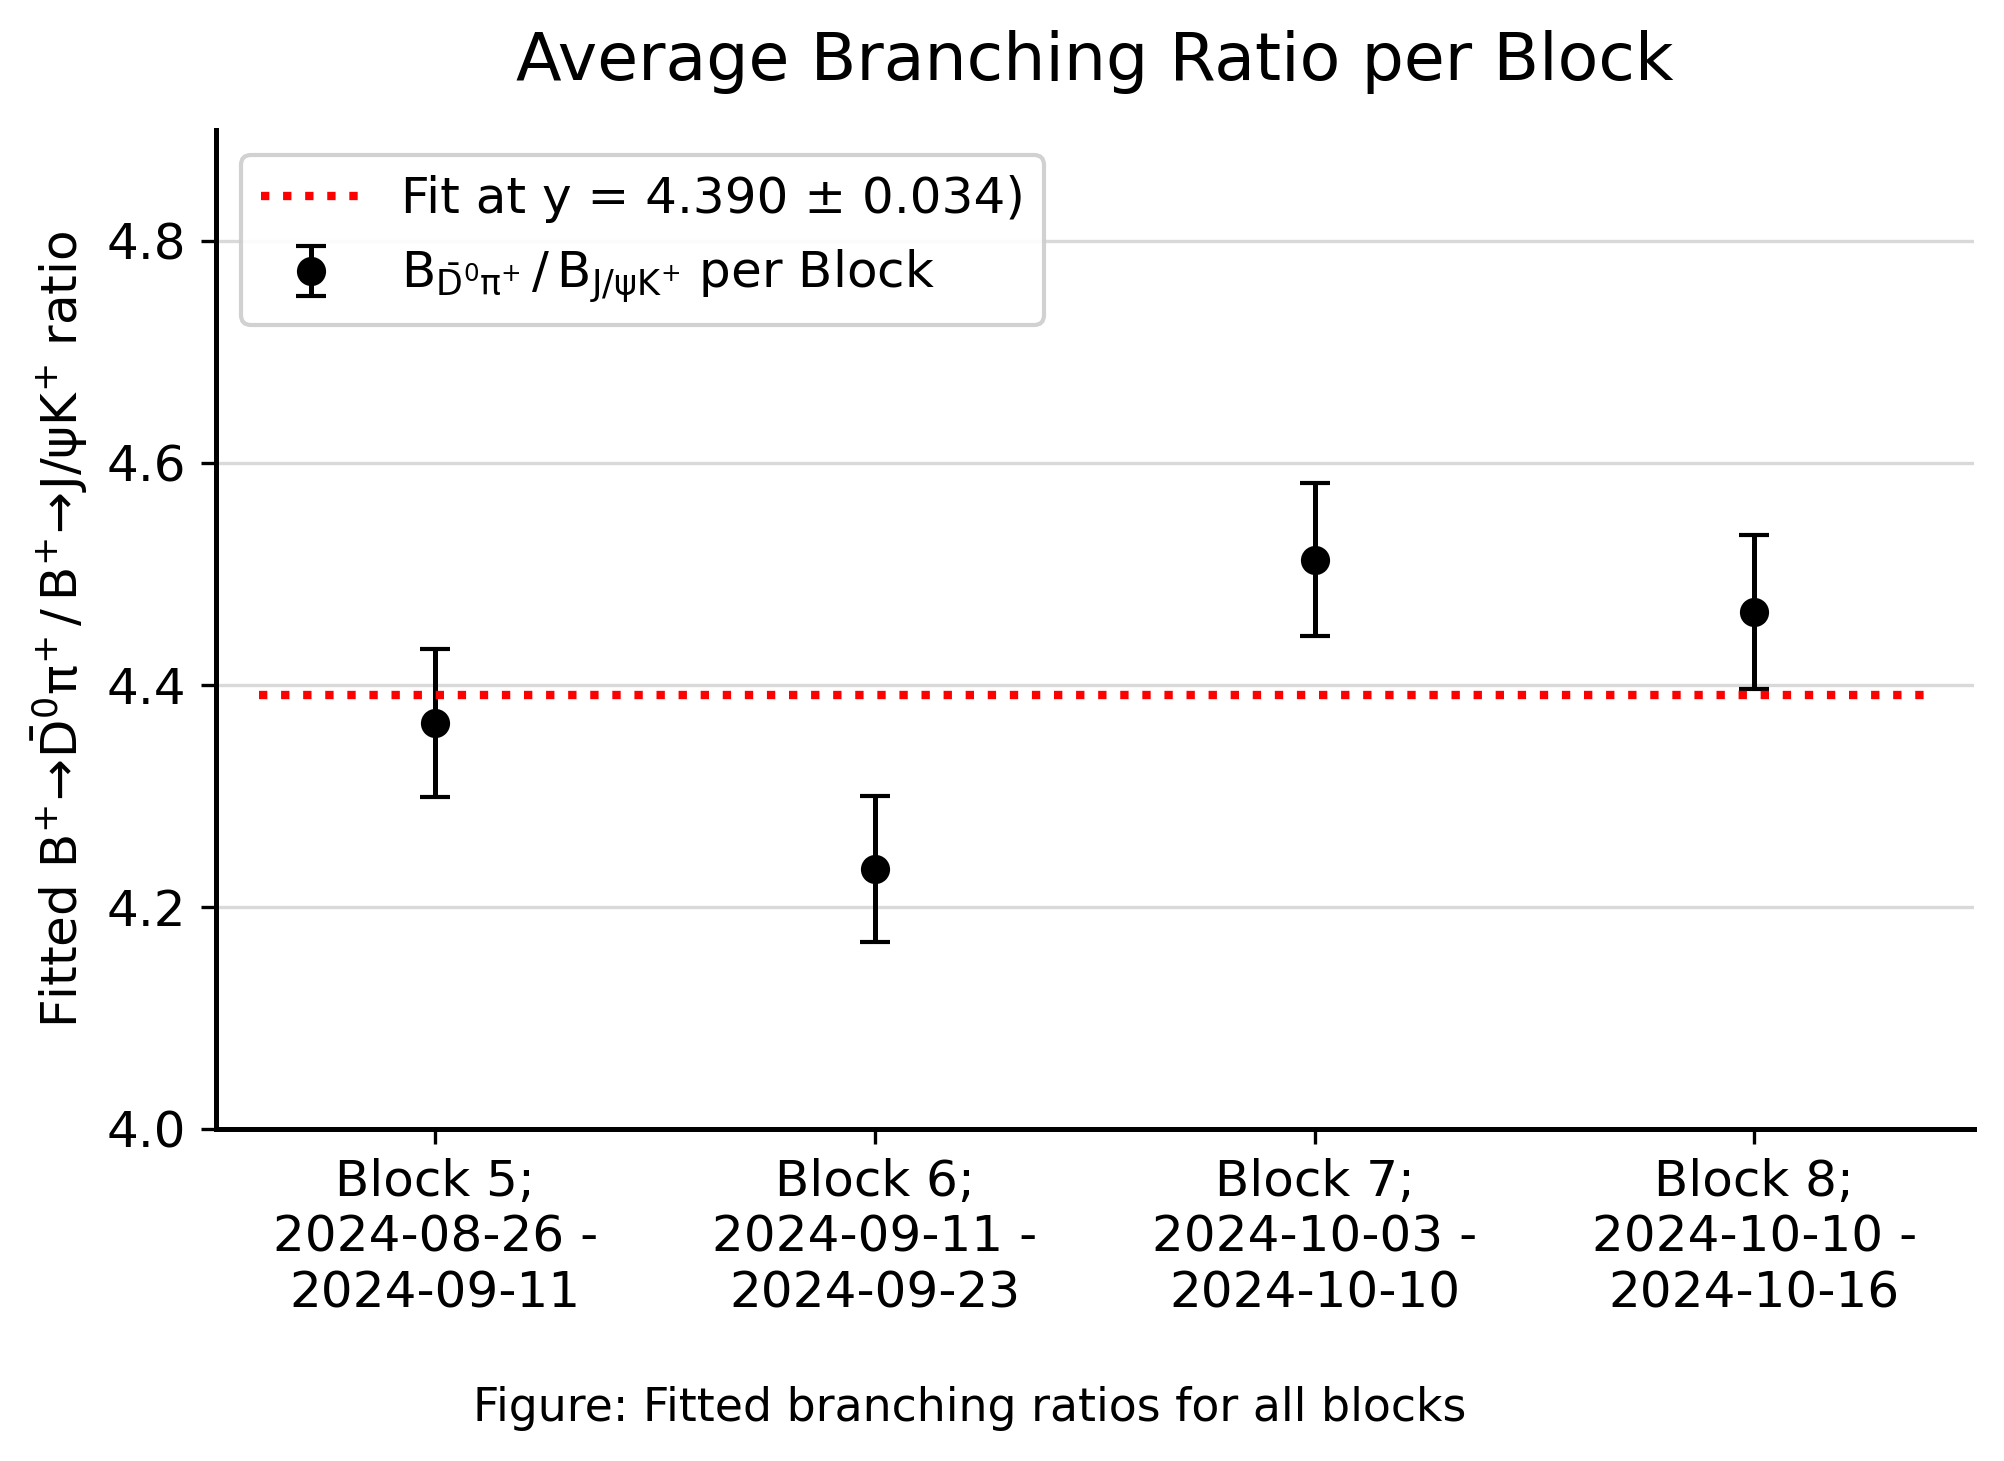

In [ ]:

import numpy as np
import matplotlib.pyplot as plt

def fit_constant(y, yerr):
    """Do a weighted average assuming a constant fit.
       Returns mean, error, chi2, ndof."""
    y = np.asarray(y, dtype=float)
    yerr = np.asarray(yerr, dtype=float)
    w = 1.0 / (yerr**2)
    ybar = np.sum(w * y) / np.sum(w)
    ybar_err = np.sqrt(1.0 / np.sum(w))
    # chi2 test for the constant null hypothesis
    chi2 = np.sum(((y - ybar) / yerr) ** 2)
    ndof = len(y) - 1
    return ybar, ybar_err, chi2, ndof

def plot_block_ratios(
    blocks,               # list of block labels
    ratios,               # central values per block
    ratio_errs,           # corresponding 1σ errors
    *,
    title=r"Average $N_{\bar{D}^{0}\pi^{+}} \,/\, N_{J/\psi K^{+}}$ per block",
    ylabel=r"Fitted $B^{+}\!\to\!\bar{D}^{0}\pi^{+}\,/\,B^{+}\!\to\!J/\psi K^{+}$ ratio",
    ylimits=(3.5, 4.5),   # y-axis range
    caption="Figure: Fitted yield ratios for all blocks, not corrected for efficiency",
    figwidth=7.2, figheight=5.0,
    outfile=None          # optional: write plot to file, set to OFF
):
    blocks = list(blocks)
    ratios = np.asarray(ratios, dtype=float)
    ratio_errs = np.asarray(ratio_errs, dtype=float)

    # constant fit across all blocks
    ybar, ybar_err, chi2, ndof = fit_constant(ratios, ratio_errs)
    fit_label = f"Fit at y = {ybar:.3f} ± {ybar_err:.3f})"

    # basic style settings
    plt.rcParams.update({
        "figure.dpi": 300,
        "savefig.dpi": 300,
        "axes.linewidth": 1.2,
        "axes.grid": True,
        "grid.color": "#C0C0C0",
        "grid.linestyle": "-",
        "grid.alpha": 0.6,
        "font.size": 12,
        "mathtext.default": "regular",
    })

    fig, ax = plt.subplots(figsize=(figwidth, figheight))

    # x positions for the blocks
    x = np.arange(len(blocks))

    # data points with error bars
    ax.errorbar(
        x, ratios, yerr=ratio_errs,
        fmt="o", color="black", ecolor="black", elinewidth=1.2,
        capsize=3.5, markersize=6, label=r"$B_{\bar{D}^{0}\pi^{+}} \,/\, B_{J/\psi K^{+}}$ per Block"
    )

    # horizontal line showing the constant fit
    ax.hlines(ybar, x.min()-0.4, x.max()+0.4, colors="red", linestyles="dotted", linewidth=2.0,
              label=fit_label)

    # axis ranges
    ax.set_xlim(-0.5, len(blocks)-0.5)
    if ylimits is not None:
        ax.set_ylim(*ylimits)

    ax.set_title(title, pad=12, fontsize=16)
    ax.set_ylabel(ylabel)

    # x-axis tick labels (can include line breaks)
    ax.set_xticks(x, blocks)

    # grid only on y
    ax.yaxis.grid(True)
    ax.xaxis.grid(False)

    # remove top/right borders
    for spine in ("top", "right"):
        ax.spines[spine].set_visible(False)

    # legend with semi-transparent background
    leg = ax.legend(loc="upper left", frameon=True)
    leg.get_frame().set_alpha(0.9)

    # caption below the figure
    fig.text(0.5, 0.01, caption, ha="center", va="bottom", fontsize=11)

    fig.tight_layout(rect=(0.04, 0.05, 0.99, 0.98))

    if outfile:
        fig.savefig(outfile, bbox_inches="tight")
    return fig, ax, (ybar, ybar_err, chi2, ndof)


# Running the functino with our input values
if __name__ == "__main__":
    blocks = [
        "Block 5;\n2024-08-26 -\n2024-09-11",
        "Block 6;\n2024-09-11 -\n2024-09-23",
        "Block 7;\n2024-10-03 -\n2024-10-10",
        "Block 8;\n2024-10-10 -\n2024-10-16",
    ]

    # INPUT VALUES
    ratios =    [4.365835524758542, 4.233966881889545, 4.51290114225437, 4.465345219414248]
    ratio_errs = [0.06661310652, 0.06620322986, 0.0691058306, 0.06934405474]

    title = r"Average Branching Ratio per Block"
    caption = "Figure: Fitted branching ratios for all blocks"
    ylimits = (4, 4.9)

    fig, ax, fit = plot_block_ratios(
        blocks, ratios, ratio_errs,
        title=title,
        caption=caption,
        ylimits=ylimits,
        outfile="block_ratios.png",
    )
    print(f"Weighted mean = {fit[0]:.6f} ± {fit[1]:.6f}  (chi2/ndof = {fit[2]:.2f}/{fit[3]})")
    plt.show()
